# Machine Learning


### Question 1 — Differences between AI, ML, Deep Learning (DL), and Data Science (DS)

AI is the broadest field... ML is a subset... DL is a subset of ML... Data Science uses ML/DL as tools.

### Question 2 — Types of Machine Learning

1. Supervised (example: spam detection)
2. Unsupervised (customer segmentation)
3. Semi-supervised (webpage classification)
4. Reinforcement learning (game agents)
5. Self-supervised (language models)
6. Transfer learning (pretrained CNN for medical imaging).

### Question 3 — Overfitting, Underfitting, Bias–Variance tradeoff

Overfitting: low training error, high test error.
Underfitting: high training & test error.
Bias-Variance tradeoff: balance complexity to minimize generalization error.

### Question 4 — Outliers and techniques

Outliers are unusual data points. Techniques:
- Removal
- Winsorization
- Robust methods (transformations, robust models).

### Question 5 — Handling missing values

Steps: assess, decide, impute, validate.
Numeric imputation: mean/median.
Categorical imputation: mode or 'Missing' category.

### Question 6 — Synthetic imbalanced dataset

In [1]:

from collections import Counter
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_redundant=1,
                           n_clusters_per_class=1, weights=[0.95, 0.05], random_state=42)
print("Class distribution:", Counter(y))
print("Sample labels (first 50):", y[:50])


Class distribution: Counter({np.int64(0): 942, np.int64(1): 58})
Sample labels (first 50): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Question 7 — One-hot encoding

In [2]:

import pandas as pd

colors = ['Red', 'Green', 'Blue', 'Green', 'Red']
df = pd.DataFrame({'color': colors})
df_encoded = pd.get_dummies(df, columns=['color'])
print(df_encoded)
df_encoded


   color_Blue  color_Green  color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False         True      False
4       False        False       True


,color_Blue,color_Green,color_Red
0,False,False,True
1,False,True,False
2,True,False,False
3,False,True,False
4,False,False,True


### Question 8 — Normal samples with missing values, mean imputation, histograms

Missing count before imputation: 50


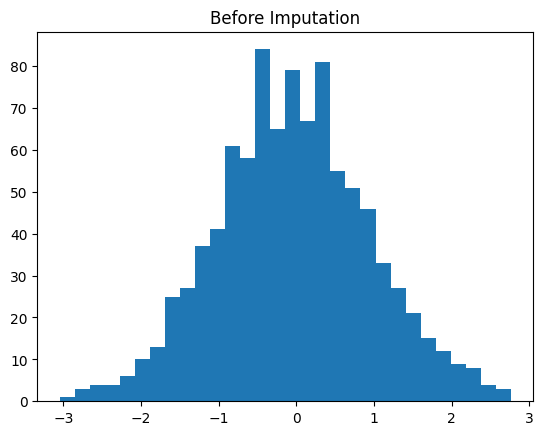

Mean used for imputation: -0.04208369455948478
Missing count after imputation: 0


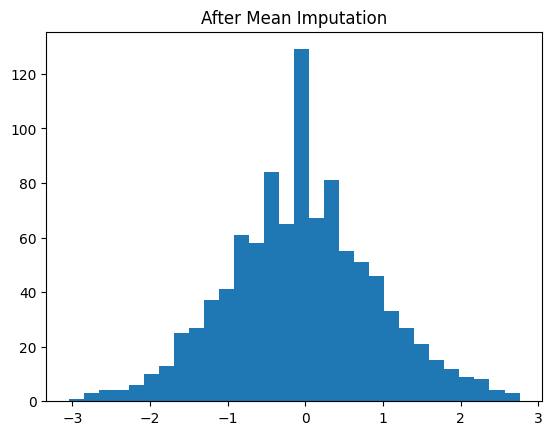

In [3]:

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
data = np.random.normal(0, 1, 1000)
data_with_nan = data.copy()
missing_indices = np.random.choice(len(data), 50, replace=False)
data_with_nan[missing_indices] = np.nan

print("Missing count before imputation:", np.isnan(data_with_nan).sum())

# Plot before imputation
plt.hist(data_with_nan[~np.isnan(data_with_nan)], bins=30)
plt.title("Before Imputation")
plt.show()

# Impute with mean
mean_val = np.nanmean(data_with_nan)
data_imputed = np.where(np.isnan(data_with_nan), mean_val, data_with_nan)

print("Mean used for imputation:", mean_val)
print("Missing count after imputation:", np.isnan(data_imputed).sum())

# Plot after imputation
plt.hist(data_imputed, bins=30)
plt.title("After Mean Imputation")
plt.show()


### Question 9 — Min-Max scaling

In [4]:

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

numbers = [[2],[5],[10],[15],[20]]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(numbers)

df_scaled = pd.DataFrame({'original':[2,5,10,15,20], 'scaled':scaled.flatten()})
print(df_scaled)
df_scaled


   original    scaled
0         2  0.000000
1         5  0.166667
2        10  0.444444
3        15  0.722222
4        20  1.000000


,original,scaled
0,2,0.000000
1,5,0.166667
2,10,0.444444
3,15,0.722222
4,20,1.000000


### Question 10 — Data preparation plan for retail transaction dataset


Steps:

1. Explore dataset: check missingness, outliers, class imbalance.

2. Handle missing ages: median/grouped imputation + missing flag.

3. Handle outliers in transaction amount: cap at percentiles, log-transform, or robust models.

4. Class imbalance: use resampling (SMOTE/undersampling), class weights, anomaly detection.

5. Encode categorical variables: one-hot encoding for low-cardinality, target/frequency encoding for high-cardinality.

6. Feature engineering: time-based, behavioral, interaction features.

7. Scaling: StandardScaler or MinMaxScaler where required.

8. Build pipelines, ensure no leakage (apply imputation/encoding on train split only).

9. Model selection: logistic regression with class weights, Random Forest, XGBoost.

10. Evaluation: precision, recall, F1, PR-AUC (better for imbalanced data).

